In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
starbucks_csvfile = 'Cleaned_Starbucks_Data/starbucks.csv'
income_csvfile = 'Resources/cleaned_income_df.csv'

starbucks_data = pd.read_csv(starbucks_csvfile)
income_data = pd.read_csv(income_csvfile)

Cleaning & Organization

In [3]:
starbucks_data.head()

,Store Number,Store Name,City,State/Province,Country,Postcode,Longitude,Latitude
0,3513-125945,Safeway-Anchorage #1809,Anchorage,AK,US,995042300,-149.78,61.21
1,74352-84449,Safeway-Anchorage #2628,Anchorage,AK,US,995073444,-149.84,61.14
2,12449-152385,Safeway - Anchorage #1813,Anchorage,AK,US,995153596,-149.85,61.11
3,24936-233524,100th & C St - Anchorage,Anchorage,AK,US,99515,-149.89,61.13
4,8973-85630,Old Seward & Diamond,Anchorage,AK,US,995152050,-149.86,61.14


In [4]:
starbucks_data['Zip Code'] = starbucks_data['Postcode'].where(starbucks_data['Postcode'].str.len() == 5, 
                                                              starbucks_data['Postcode'].str[:5])
starbucks_data.head()

,Store Number,Store Name,City,State/Province,Country,Postcode,Longitude,Latitude,Zip Code
0,3513-125945,Safeway-Anchorage #1809,Anchorage,AK,US,995042300,-149.78,61.21,99504
1,74352-84449,Safeway-Anchorage #2628,Anchorage,AK,US,995073444,-149.84,61.14,99507
2,12449-152385,Safeway - Anchorage #1813,Anchorage,AK,US,995153596,-149.85,61.11,99515
3,24936-233524,100th & C St - Anchorage,Anchorage,AK,US,99515,-149.89,61.13,99515
4,8973-85630,Old Seward & Diamond,Anchorage,AK,US,995152050,-149.86,61.14,99515


In [5]:
income_data.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


In [6]:
income_df = income_data.rename(columns={"State_ab": "State", "County": "County", "City": "City",
                                          "Zip_Code": "Postcode", "Lat": "Latitude", "Lon": "Longitude",
                                          "Mean": "Mean", "Median": "Median", "Stdev": "Standard Deviation"})
income_df.head()

,State,County,City,Type,Postcode,Latitude,Longitude,Mean,Median,Standard Deviation
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


In [7]:
income_df['Postcode'] = income_df['Postcode'].apply(str)

Merging the Datasets & Cleaning the Data

In [8]:
combined_df = pd.merge(starbucks_data, income_df, on="Postcode", how="inner")
combined_df.head()

,Store Number,Store Name,City_x,State/Province,Country,Postcode,Longitude_x,Latitude_x,Zip Code,State,County,City_y,Type,Latitude_y,Longitude_y,Mean,Median,Standard Deviation
0,24936-233524,100th & C St - Anchorage,Anchorage,AK,US,99515,-149.89,61.13,99515,AK,Aleutians East Borough,Anchorage,Track,61.122781,-149.963376,92426,300000,47964
1,75988-107245,ANC Main Terminal Ticketing,Anchorage,AK,US,99502,-149.98,61.18,99502,AK,Aleutians East Borough,Anchorage,Track,61.164811,-150.177803,115266,115283,81014
2,75988-107245,ANC Main Terminal Ticketing,Anchorage,AK,US,99502,-149.98,61.18,99502,AK,Aleutians East Borough,Anchorage,Track,61.147850,-149.925251,95568,79940,55248
3,28028-249124,ANC - Baggage Claim,Anchorage,AK,US,99502,-149.95,61.15,99502,AK,Aleutians East Borough,Anchorage,Track,61.164811,-150.177803,115266,115283,81014
4,28028-249124,ANC - Baggage Claim,Anchorage,AK,US,99502,-149.95,61.15,99502,AK,Aleutians East Borough,Anchorage,Track,61.147850,-149.925251,95568,79940,55248


In [9]:
clean_df = combined_df.drop_duplicates(["Store Name"], keep='last')
clean_df.head()

,Store Number,Store Name,City_x,State/Province,Country,Postcode,Longitude_x,Latitude_x,Zip Code,State,County,City_y,Type,Latitude_y,Longitude_y,Mean,Median,Standard Deviation
0,24936-233524,100th & C St - Anchorage,Anchorage,AK,US,99515,-149.89,61.13,99515,AK,Aleutians East Borough,Anchorage,Track,61.122781,-149.963376,92426,300000,47964
2,75988-107245,ANC Main Terminal Ticketing,Anchorage,AK,US,99502,-149.98,61.18,99502,AK,Aleutians East Borough,Anchorage,Track,61.147850,-149.925251,95568,79940,55248
4,28028-249124,ANC - Baggage Claim,Anchorage,AK,US,99502,-149.95,61.15,99502,AK,Aleutians East Borough,Anchorage,Track,61.147850,-149.925251,95568,79940,55248
7,20349-108249,Fred Meyer-Anchorage East #18,Anchorage,AK,US,99504,-149.74,61.21,99504,AK,Aleutians East Borough,Anchorage,Track,61.202201,-149.764406,97885,300000,47596
10,17941-159568,Tikahtnu Commons - Anchorage,Anchorage,AK,US,99504,-149.74,61.23,99504,AK,Aleutians East Borough,Anchorage,Track,61.202201,-149.764406,97885,300000,47596


In [10]:
pretty_df = clean_df[["Store Number", "Store Name", "City_x", "State", "County", "Zip Code", "Type", "Latitude_y", "Longitude_y", "Mean", "Median", "Standard Deviation"]]
pretty_df.head()

,Store Number,Store Name,City_x,State,County,Zip Code,Type,Latitude_y,Longitude_y,Mean,Median,Standard Deviation
0,24936-233524,100th & C St - Anchorage,Anchorage,AK,Aleutians East Borough,99515,Track,61.122781,-149.963376,92426,300000,47964
2,75988-107245,ANC Main Terminal Ticketing,Anchorage,AK,Aleutians East Borough,99502,Track,61.147850,-149.925251,95568,79940,55248
4,28028-249124,ANC - Baggage Claim,Anchorage,AK,Aleutians East Borough,99502,Track,61.147850,-149.925251,95568,79940,55248
7,20349-108249,Fred Meyer-Anchorage East #18,Anchorage,AK,Aleutians East Borough,99504,Track,61.202201,-149.764406,97885,300000,47596
10,17941-159568,Tikahtnu Commons - Anchorage,Anchorage,AK,Aleutians East Borough,99504,Track,61.202201,-149.764406,97885,300000,47596


In [11]:
organized_df = pretty_df.rename(columns={"City_x": "City", "Latitude_y": "Latitude", "Longitude_y": "Longitude"})
organized_df.head()

,Store Number,Store Name,City,State,County,Zip Code,Type,Latitude,Longitude,Mean,Median,Standard Deviation
0,24936-233524,100th & C St - Anchorage,Anchorage,AK,Aleutians East Borough,99515,Track,61.122781,-149.963376,92426,300000,47964
2,75988-107245,ANC Main Terminal Ticketing,Anchorage,AK,Aleutians East Borough,99502,Track,61.147850,-149.925251,95568,79940,55248
4,28028-249124,ANC - Baggage Claim,Anchorage,AK,Aleutians East Borough,99502,Track,61.147850,-149.925251,95568,79940,55248
7,20349-108249,Fred Meyer-Anchorage East #18,Anchorage,AK,Aleutians East Borough,99504,Track,61.202201,-149.764406,97885,300000,47596
10,17941-159568,Tikahtnu Commons - Anchorage,Anchorage,AK,Aleutians East Borough,99504,Track,61.202201,-149.764406,97885,300000,47596


Creating a Bar Chart to compare the number of Starbucks within different levels of household incomes

In [12]:
organized_df["Median"].describe()

count      3498.000000
mean     102206.224986
std       89598.315343
min        4790.000000
25%       44921.500000
50%       67300.500000
75%      107026.250000
max      300000.000000
Name: Median, dtype: float64

In [13]:
bins = [0, 29999.99, 59999.99, 89999.99, 119999.99, 149999.99, 179999.99, 
        209999.99, 239999.99, 269999.99, 300000.00]

group_names = ['Under 30k', '30-60k', '60-90k', '90-120k', '120-150k', 
               '150-180k', '180-210k', '210-240k', '240-270k', '270k+']

organized_df["Median Bins"] = pd.cut(organized_df["Median"], bins, labels = group_names, include_lowest = True)

In [14]:
organized_df

,Store Number,Store Name,City,State,County,Zip Code,Type,Latitude,Longitude,Mean,Median,Standard Deviation,Median Bins
0,24936-233524,100th & C St - Anchorage,Anchorage,AK,Aleutians East Borough,99515,Track,61.122781,-149.963376,92426,300000,47964,270k+
2,75988-107245,ANC Main Terminal Ticketing,Anchorage,AK,Aleutians East Borough,99502,Track,61.147850,-149.925251,95568,79940,55248,60-90k
4,28028-249124,ANC - Baggage Claim,Anchorage,AK,Aleutians East Borough,99502,Track,61.147850,-149.925251,95568,79940,55248,60-90k
7,20349-108249,Fred Meyer-Anchorage East #18,Anchorage,AK,Aleutians East Borough,99504,Track,61.202201,-149.764406,97885,300000,47596,270k+
10,17941-159568,Tikahtnu Commons - Anchorage,Anchorage,AK,Aleutians East Borough,99504,Track,61.202201,-149.764406,97885,300000,47596,270k+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,29314-251304,Yellowstone and Storey - Cheyenne,Cheyenne,WY,Albany County,82009,Track,41.181198,-104.787849,77348,68371,55082,60-90k
10857,19240-195904,"Jackson, WY",Jackson,WY,Albany County,83001,Track,43.473115,-110.688603,81636,300000,66280,270k+
10859,18274-101208,Smith's - Jackson Hole #184,Jackson Hole,WY,Albany County,83001,Track,43.473115,-110.688603,81636,300000,66280,270k+
10860,22353-220004,Safeway - Lander 2761,Lander,WY,Fremont County,82520,City,42.831276,-108.759894,62094,50883,48936,30-60k


In [15]:
organized_df["Median Bins"].value_counts()

30-60k       1187
60-90k        884
270k+         535
90-120k       407
Under 30k     279
120-150k      133
150-180k       42
180-210k       24
210-240k        7
240-270k        0
Name: Median Bins, dtype: int64

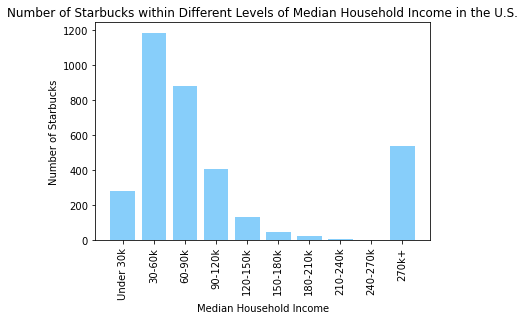

In [16]:
median_df = organized_df["Median Bins"].value_counts().sort_index()
x_axis = np.arange(len(median_df))
plt.bar(x_axis, median_df, color='lightskyblue')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names, rotation=90)

plt.title("Number of Starbucks within Different Levels of Median Household Income in the U.S.")
plt.xlabel("Median Household Income")
plt.ylabel("Number of Starbucks")
plt.show()

Finding correlation between median household income and Starbucks locations

In [32]:
regression_analysis_df = organized_df.loc[organized_df["Median"] < 300000]

state_groups_df = regression_analysis_df.groupby("State")["Store Number"].count()

state_median_income = regression_analysis_df.groupby("State")["Median"].mean()
analysis_df = pd.merge(state_groups_df, state_median_income, on="State", how="inner")

The correlation coefficient is: 0.30637204482077574
The r-squared is: 0.09386382984766342


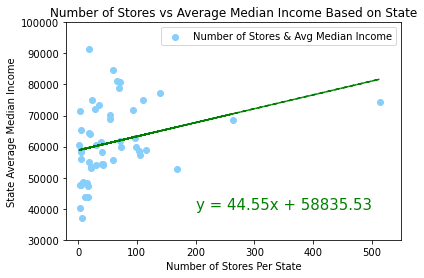

In [67]:
x_scatter = analysis_df["Store Number"]
y_scatter = analysis_df["Median"]

s_slope, s_int, s_r, s_p, s_std_err = stats.linregress(x_scatter, y_scatter)
s_fit = s_slope * x_scatter + s_int
line_eq = "y = " + str(round(s_slope, 2)) + "x + " + str(round(s_int, 2))

scatter_labels = "Number of Stores & Avg Median Income"

plt.scatter(x_scatter, y_scatter, label= scatter_labels, color='lightskyblue')
plt.plot(x_scatter, s_fit, "--", color='green')
plt.annotate(line_eq, (200, 40000), fontsize=15, color="green")
plt.legend(loc='best')

plt.xlim(-20, 550)
plt.ylim(30000, 100000)

plt.title('Number of Stores vs Average Median Income Based on State')
plt.xlabel('Number of Stores Per State')
plt.ylabel('State Average Median Income')

print(f"The correlation coefficient is: {s_r}")
print(f"The r-squared is: {s_r**2}")
plt.show()

Finding correlation between median household income and Starbucks locations based specifically in NC

In [74]:
regression_analysis_df["City"] = regression_analysis_df["City"].replace({
    "CARY": "Cary", "Winston Salem": "Winston-Salem"})

nc_df = regression_analysis_df.loc[regression_analysis_df["State"] == "NC"]

nc_starbies_df = nc_df.groupby("City")["Store Number"].count()

nc_median_income = nc_df.groupby("City")["Median"].mean()
nc_analysis_df = pd.merge(nc_starbies_df, nc_median_income, on="City", how="inner")

nc_analysis_df

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Store Number,Median
City,,
Asheville,2,53064.500000
Candler,1,29007.000000
Cary,2,66125.000000
Chapel Hill,2,87635.000000
Charlotte,12,57969.666667
Cornelius,1,137460.000000
Cullowhee,1,39802.000000
Durham,2,54267.000000
Fayetteville,3,62931.000000


The correlation coefficient is: 0.13258876416524254
The r-squared is: 0.017579780382866304


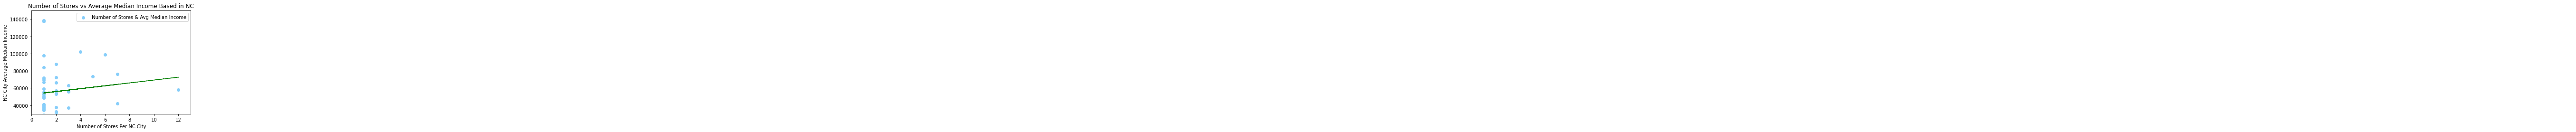

In [90]:
x_scat = nc_analysis_df["Store Number"]
y_scat = nc_analysis_df["Median"]

nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(x_scat, y_scat)
nc_fit = nc_slope * x_scat + nc_int
line_eq = "y = " + str(round(nc_slope, 2)) + "x + " + str(round(nc_int, 2))

nc_scatter = "Number of Stores & Avg Median Income"

plt.scatter(x_scat, y_scat, label= nc_scatter, color='lightskyblue')
plt.plot(x_scat, nc_fit, "--", color='green')
plt.annotate(line_eq, (200, 40000), fontsize=15, color="green")
plt.legend(loc='best')

plt.xlim(0, 13)
plt.ylim(30000, 150000)

plt.title('Number of Stores vs Average Median Income Based in NC')
plt.xlabel('Number of Stores Per NC City')
plt.ylabel('NC City Average Median Income')

print(f"The correlation coefficient is: {nc_r}")
print(f"The r-squared is: {nc_r**2}")
plt.show()